<h2>
    Diet and Weight Loss
</h2>

<h3>
    Description: 
</h3>
<p>
The data set Diet.csv contains information on 78 people who undertook one of three diets. There is background information such as age, gender and height. The aim of the study was to see which diet was best for losing weight so the independent variable (group) is diet.
</p>
<h3>Format: </h3><p> A data frame with 7 variables:</p>

<ul>
  <li>Gender - gender</li>
  <li>Age - age</li>
  <li>Height - body height</li>
  <li>Diet.type - three types of diet</li>
  <li>Initial.weight - three types of diet</li>
  <li>Final.weight - final weight after diet</li>
</ul>

<h3>
    Importing Libraries and Dataset 
</h3>

In [94]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import comb
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import seaborn as sns
import pingouin as pg

In [95]:
df = pd.read_csv('C:/Users/Максим/Desktop/Statistics/diet.csv', sep='\t')

In [96]:
df.head()

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [97]:
df.isnull().sum()

id                0
gender            0
age               0
height            0
diet.type         0
initial.weight    0
final.weight      0
dtype: int64

<h3>
    Renaming of columns
</h3>

In [98]:
df.rename(columns={'diet.type':'diet_type', 'initial.weight':'initial_weight', 'final.weight':'final_weight'},inplace = True)
df.head(1)

,id,gender,age,height,diet_type,initial_weight,final_weight
0,1,Female,22,159,A,58,54.2


<h3>
    Adding a new column: the difference between final and initial weight
</h3>

In [99]:
df['weight_loss'] = df['initial_weight'] - df['final_weight']
df.head(3)

,id,gender,age,height,diet_type,initial_weight,final_weight,weight_loss
0,1,Female,22,159,A,58,54.2,3.8
1,2,Female,46,192,A,60,54.0,6.0
2,3,Female,55,170,A,64,63.3,0.7


<h3>
    Group Information: count, mean, median
</h3>

In [100]:
(df.groupby('diet_type')
 .agg({'weight_loss': ['count',np.mean,np.median]}))

weight_loss                 
                count      mean median
diet_type                             
A                  24  3.300000   3.05
B                  25  3.268000   3.50
C                  27  5.148148   5.40

<h2>
    One-way analysis of variance
</h2>

<h3>
    Requirements for analysis of variance: 
</h3>

<ul>
  <li>The variances within our groups should be approximately the same (requirement for homogeneity of variances)</li>
  <li>If the volumes of the groups are not large enough (less than 30) and do not match in size,<br> then it is important to comply with the requirement for the normal distribution of samples</li>
</ul>



<h3>
    Let's check the homogeneity of groups using Levene's test 
</h3>
<p>Let's formulate a hypothesis:</p>
<ul>
  <li>H0 p-value > 0.05, variances within groups are homogeneous, do not reject the H0 hypothesis</li>
  <li>H1 p-value < 0.05, variances within groups are not homogeneous, reject the H0 hypothesis</li>
</ul>

In [101]:
stats.levene(df[df['diet_type']=="A"]['weight_loss'], 
                   df[df['diet_type']=="B"]['weight_loss'], 
                   df[df['diet_type']=="C"]['weight_loss'])

LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)

<p><b>p-value > 0.05, do not reject the H0 hypothesis</b></p>

<h3>
    Let's check the sample for normality using the Shapiro-Wilk test, and also build QQ-plots 
</h3>

In [102]:
stats.shapiro(df[df['diet_type'] == 'A']['weight_loss'])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [103]:
stats.shapiro(df[df['diet_type'] == 'B']['weight_loss'])

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [104]:
stats.shapiro(df[df['diet_type'] == 'C']['weight_loss'])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

<p><b>The distribution of weight_loss in groups A, B and C is normal, p-value>0.05</b></p>

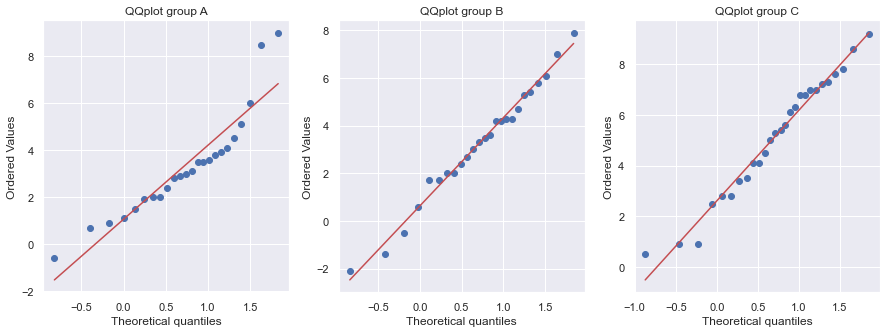

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

x = df[df['diet_type'] == 'A']['weight_loss']
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax1)
ax1.set_title('QQplot group A')

x = df[df['diet_type'] == 'B']['weight_loss']
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax2)
ax2.set_title('QQplot group B')

x = df[df['diet_type'] == 'C']['weight_loss']
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax3)
ax3.set_title('QQplot group C')
plt.show()

<h3>
    The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean
</h3>

<p>Let's formulate a hypothesis:</p>
<ul>
  <li>H0 p-value > 0.05, none of the sample means differs from the other (no differences)</li>
  <li>H1 p-value < 0.05, at least one sample mean differs from others (there are differences as
between at least two groups)</li>
</ul>

In [106]:
stats.f_oneway(df[df['diet_type']=="A"]['weight_loss'], 
               df[df['diet_type']=="B"]['weight_loss'], 
               df[df['diet_type']=="C"]['weight_loss'])

F_onewayResult(statistic=5.383104474859926, pvalue=0.006595853108669741)

<p><b>Since the p-value is less than 0.05, then
we reject the null hypothesis and conclude that the mean of at least one of the groups
significantly different from the average in other groups, p-value<0.05</b></p>

<h3>
    Due to testing several hypotheses at once, the probability of a type I error artificially increases
</h3>

In [107]:
1-(1-0.05)**comb(3, 2, exact=True)

0.1426250000000001

<p><b>For α = 0.05 and m = 3, the probability of making a Type I error is 0.143%</b></p>

<h3>
    Tukey's test to determine between which groups there are statistically significant differences
</h3>

In [108]:
print(pairwise_tukeyhsd(endog=df['weight_loss'], groups=df['diet_type'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.032 0.9988 -1.6531 1.5891  False
     A      C   1.8481 0.0188  0.2567 3.4396   True
     B      C   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


<p><b>There are statistically significant differences between groups A and C, B and C. The most effective diet in group C.</b></p>

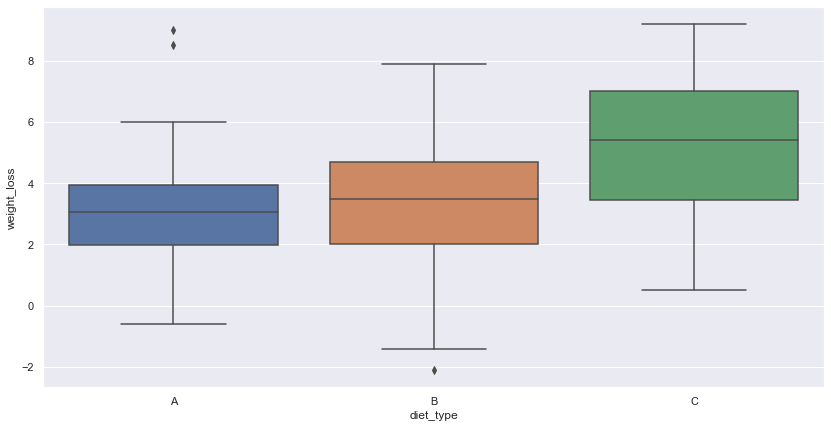

In [109]:
ax = sns.boxplot(data=df, x="diet_type", y="weight_loss")

In [110]:
df.query("diet_type == 'A' & weight_loss in [8.5,9]")

,id,gender,age,height,diet_type,initial_weight,final_weight,weight_loss
7,8,Female,28,176,A,69,60.5,8.5
47,19,Male,43,162,A,80,71.0,9.0


<h2>
    Multivariate ANOVA
</h2>

<h3>
    Group Information: count, mean, median
</h3>

In [111]:
(df.groupby(['diet_type', 'gender'], as_index=False)
 .agg({'weight_loss': ['count',np.mean,np.median]}))

diet_type  gender weight_loss                 
                          count      mean median
0         A  Female          14  3.050000   2.85
1         A    Male          10  3.650000   3.70
2         B  Female          14  2.607143   2.85
3         B    Male          11  4.109091   4.30
4         C  Female          15  5.880000   6.80
5         C    Male          12  4.233333   3.80

In [112]:
model2 = pg.anova(data=df, dv='weight_loss', between=['diet_type', 'gender'], detailed=True)
round(model2, 4)

,Source,SS,DF,MS,F,p-unc,np2
0,diet_type,60.4172,2.0,30.2086,5.6190,0.0055,0.1383
1,gender,0.1687,1.0,0.1687,0.0314,0.8599,0.0004
2,diet_type * gender,33.9041,2.0,16.9520,3.1532,0.0488,0.0826
3,Residual,376.3290,70.0,5.3761,NaN,NaN,NaN


<p><b>The gender of the participant does not have a statistical effect on the outcome of the diet.</b></p>

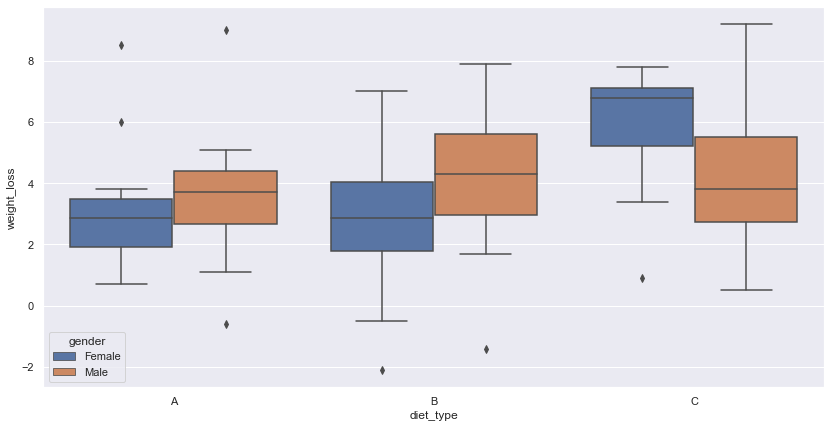

In [113]:
ax = sns.boxplot(data=df, x="diet_type", y="weight_loss", hue="gender")

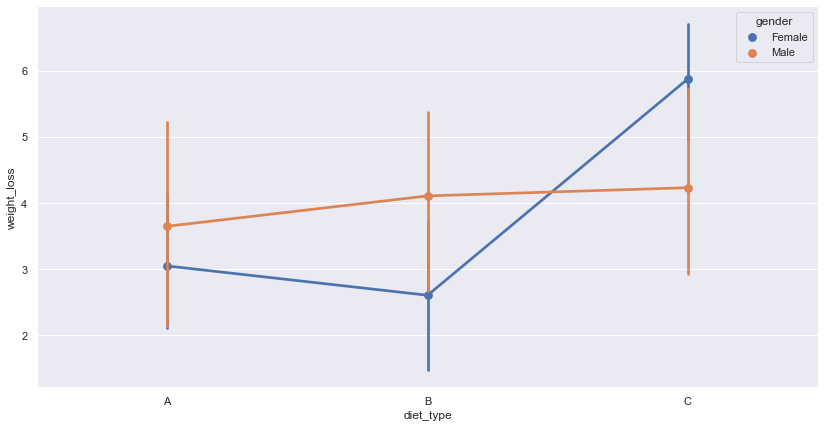

In [114]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14,7)})
sns.pointplot(x='diet_type' , y='weight_loss' , data=df, hue='gender')
sns.despine()

<p><b>The group factor turned out to be SIGNIFICANT, the segment gender - NOT SIGNIFICANT, their interaction - SIGNIFICANT.</b></p>